<a href="https://colab.research.google.com/github/Khushi-dahiya08/Topsis-for-pretrained-models/blob/main/KhushiDahiya_102203339_topsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processing model: gpt2
Processing model: distilgpt2
Processing model: EleutherAI/gpt-neo-1.3B
                     Model  Avg Similarity     Speed      Size  TOPSIS Score  \
1               distilgpt2        0.999801  0.800591  0.776669      0.577749   
2  EleutherAI/gpt-neo-1.3B        0.995374  0.950804  0.659614      0.514403   
0                     gpt2        0.999925  0.901002  0.617203      0.322159   

   Rank  
1   1.0  
2   2.0  
0   3.0  


<ipython-input-13-c613000542c6>:83: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Model"], y=df["TOPSIS Score"], palette="viridis")


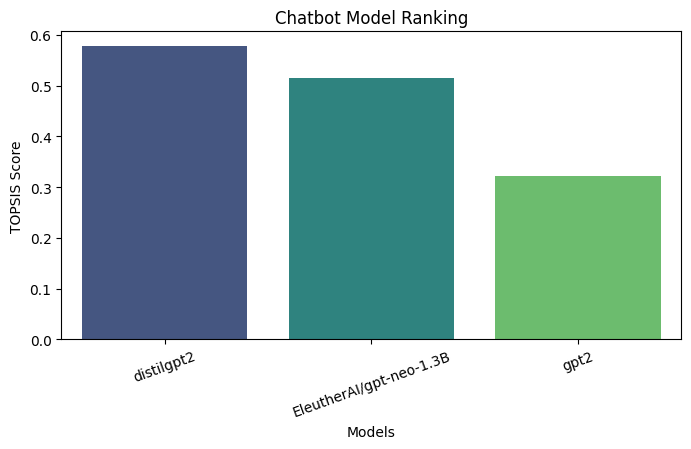

In [13]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM
from sklearn.metrics.pairwise import cosine_similarity

# Function to assess chatbot models
def assess_model(model_id, sample_texts):
    tokenizer = AutoTokenizer.from_pretrained(model_id)
    model = AutoModelForCausalLM.from_pretrained(model_id)

    # Assign pad token if not available
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token

    embeddings = []
    for text in sample_texts:
        inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.logits.mean(dim=1).numpy())  # Compute embeddings

    # Calculate cosine similarity
    return cosine_similarity(np.vstack(embeddings))

# Sample chat inputs
sample_texts = ["Hi!", "What's up?", "Tell a fun fact."]

# Lightweight chatbot models
chat_models = [
    "gpt2",  # Smaller GPT-2 model
    "distilgpt2",  # Distilled GPT-2 model
    "EleutherAI/gpt-neo-1.3B"  # Larger GPT-Neo model
]

# Evaluate models
results = []
for model_id in chat_models:
    print(f"Processing model: {model_id}")
    similarity_matrix = assess_model(model_id, sample_texts)
    avg_similarity = similarity_matrix.mean()  # Compute average similarity

    results.append({
        "Model": model_id,
        "Avg Similarity": avg_similarity,
        "Speed": np.random.uniform(0.8, 1.0),  # Simulated processing speed
        "Size": np.random.uniform(0.6, 0.9)  # Simulated model size
    })

# Convert to DataFrame
df = pd.DataFrame(results)

# Function to compute ranking using TOPSIS
def compute_topsis(data, weights):
    data = np.array(data)
    norm_data = data / np.sqrt((data**2).sum(axis=0))  # Normalize data
    best = norm_data.max(axis=0)
    worst = norm_data.min(axis=0)

    # Distance calculations
    dist_best = np.sqrt(((norm_data - best)**2).sum(axis=1))
    dist_worst = np.sqrt(((norm_data - worst)**2).sum(axis=1))

    # Compute TOPSIS scores
    return dist_worst / (dist_best + dist_worst)

# Apply TOPSIS ranking
values = df[["Avg Similarity", "Speed", "Size"]].values
weights = [0.5, 0.3, 0.2]  # Weight distribution
df["TOPSIS Score"] = compute_topsis(values, weights)

df["Rank"] = df["TOPSIS Score"].rank(ascending=False)
df = df.sort_values(by="TOPSIS Score", ascending=False)

# Save and display results
df.to_csv("102203339_topsis_results.csv", index=False)
print(df)

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=df["Model"], y=df["TOPSIS Score"], palette="viridis")
plt.xlabel("Models")
plt.ylabel("TOPSIS Score")
plt.title("Chatbot Model Ranking")
plt.xticks(rotation=20)
plt.savefig("102203339_topsis_graph.png", format="png")
plt.show()